In [5]:
import pandas as pd


In [24]:
df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\WDM\RAV16\Plates\LONG-PM-NS-R1_R16_230302151337_S1_TEX.dat')
#df = pd.read_csv(r'/Users/royj/development/LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat')
#df = pd.read_csv(r'\\trllimited\data\INF_TRACS\TRACS5\1 - Accreditation\RAV17\5-Accreditation-May23\CC Output\TRACS4\Plates\Texture\RAV17_NS_Run_1_A.dat')
# df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\PTS\MFV1 resubmission\ProfileMats\LONG-PM-NS-R2_rcd_AB1_tex.dat')
#df = pd.read_csv(r'\\trllimited\data\Vehicle_Validation_SCANNER\Accreditation\2023\PTS\MFV2 sumbission2\ProfileMats\LONG-PM-NS-R1_AB1_tex.dat')

In [26]:
minimum_texture = min(df.Texture)

adjustment_value = abs(minimum_texture)

#df.adjusted_Tex = df.Texture + adjustment_value
df['adjusted_Tex'] = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

readings_per_metre = len(df.Chainage) / max(df.Chainage)
print("readings per metre", readings_per_metre)
hertz = readings_per_metre/2
print("hertz", hertz)

readings per metre 1005.7701842080384
hertz 502.8850921040192


8666


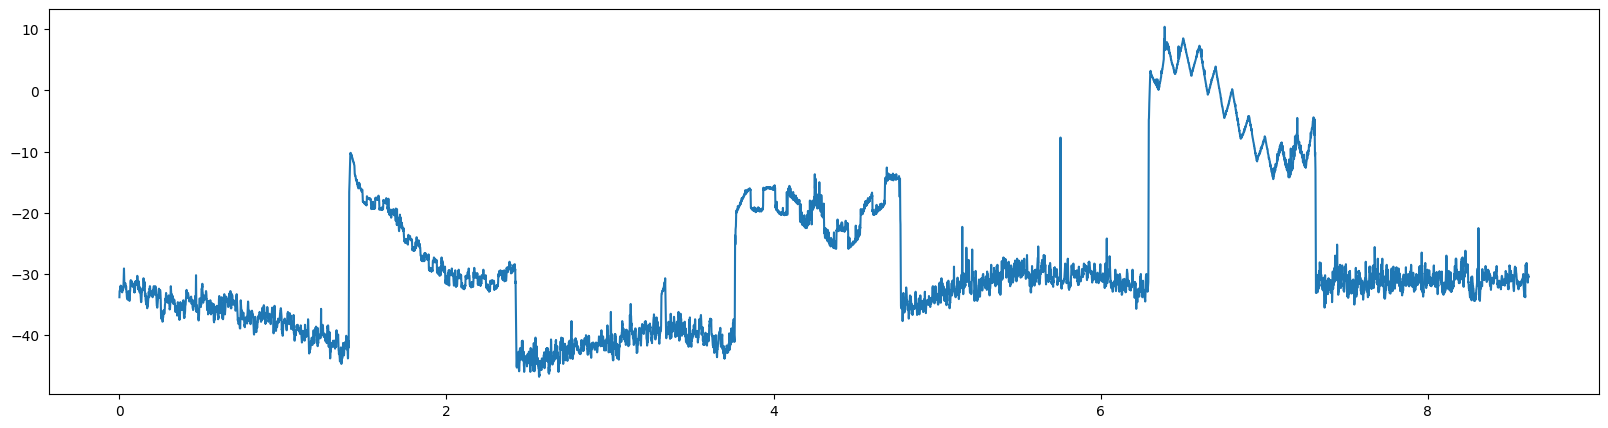

In [27]:
from matplotlib import pyplot as plt
import matplotlib as mpl


print(len(df.Chainage))
plt.subplots(figsize=(20,5))
plt.plot(df.Chainage, df.Texture)

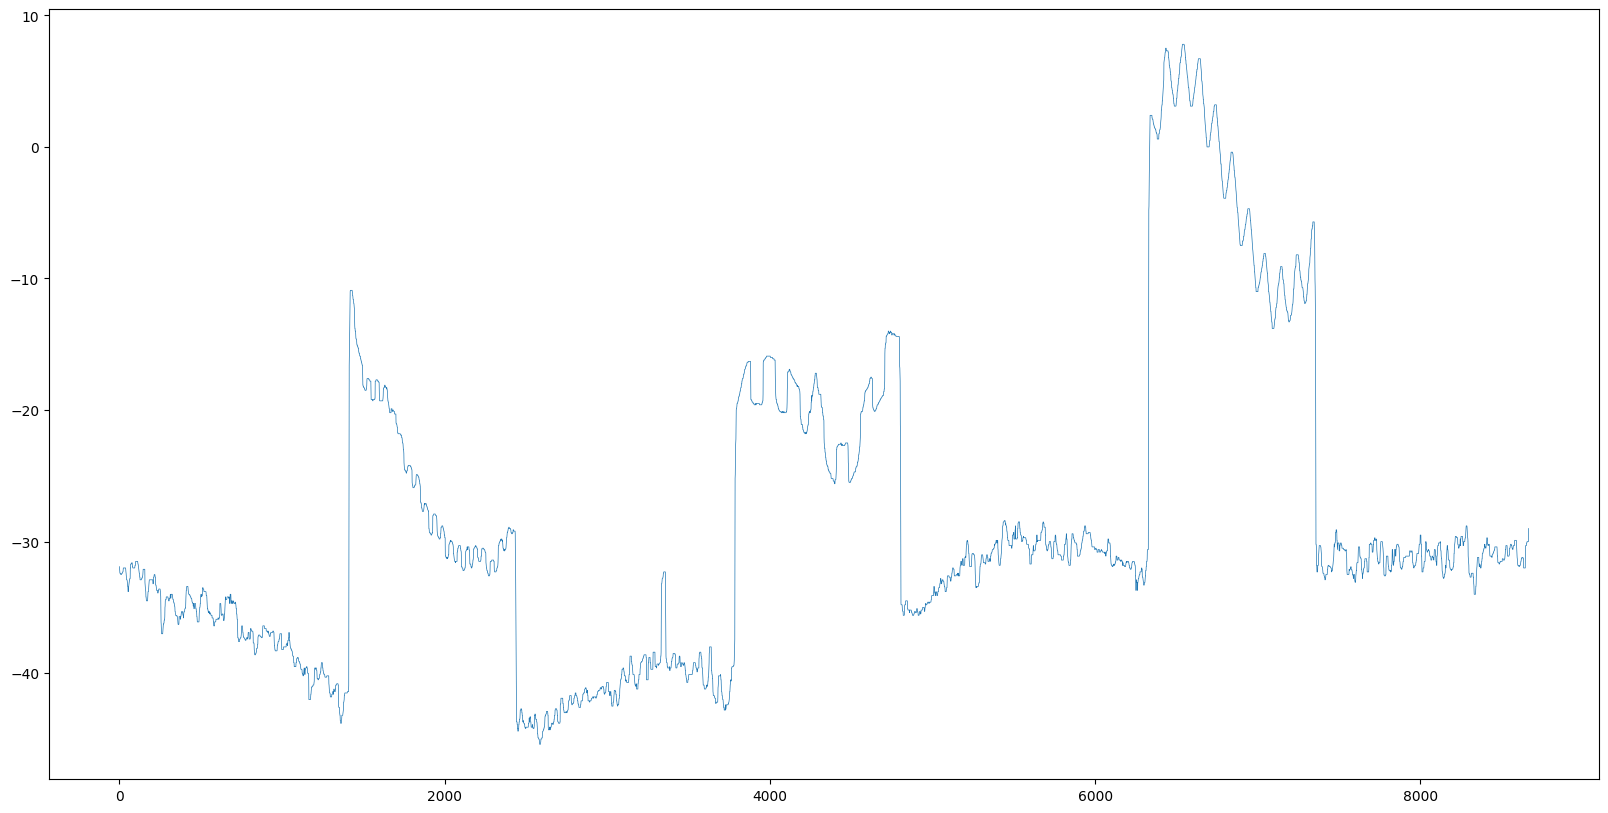

In [94]:
import matplotlib.pyplot as plt
from scipy import signal

df_filt = df.copy()

df_filt['y_med'] = signal.medfilt(df.Texture, kernel_size=21)

# plot the filtered data.

plt.figure(figsize=(20, 10))
plt.plot(df_filt.y_med, label='Plate 1',linewidth=0.5)
#plt.plot(df_plate1.Chainage, df_plate1.y_med, label='Plate 1',linewidth=0.5)
plt.show()

In [51]:
# %pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [91]:
#from scipy import fftpack
import scipy
import numpy as np
texture_array = df[['Texture']].to_numpy()
#scipy.fftpack.fft(texture_array)
#texture_array[np.isreal(sig_noise_fft)]
sig_noise_fft = scipy.fftpack.fft(texture_array)
real_fft = np.real(sig_noise_fft).ravel()
#real_fft_array = np.array[real_fft]
#print(real_fft)

#print(np.isreal(sig_noise_fft))
#sig_noise_amp = 2 / df.Chainage * np.abs(sig_noise_fft[:0])
sig_noise_amp = df.Chainage * np.abs(real_fft)
sig_noise_freq = np.abs(scipy.fftpack.fftfreq(len(df.Chainage), (df.Chainage/hertz)))

print("Freq = ", sig_noise_freq, "Amp = ",sig_noise_amp)

Freq =  0        0.000000
1       43.372593
2       49.762349
3       52.332254
4       53.719385
          ...    
8661     0.033690
8662     0.026949
8663     0.020209
8664     0.013471
8665     0.006735
Name: Chainage, Length: 8666, dtype: float64 Amp =  0         0.011614
1         0.043884
2         0.076499
3         0.108780
4         0.139999
           ...    
8661    270.426367
8662    266.150951
8663    259.290251
8664    262.766277
8665    262.796615
Name: Chainage, Length: 8666, dtype: float64


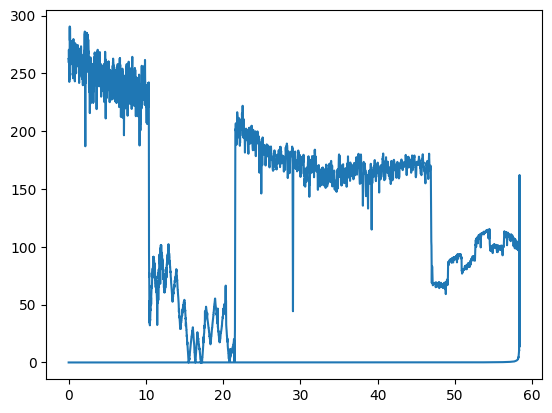

In [92]:
plt.plot(sig_noise_freq, sig_noise_amp)
#texture_array_real = 
# #texture_array[np.isreal(sig_noise_fft)]
# #scipy.fftpack.fft(texture_array[:])
# from scipy import stats
# stats.describe(real_fft)

In [42]:
# apply a low pass filter.

import numpy as np
from scipy.signal import butter,filtfilt
# Filter requirements.
T = len(df.Chainage)        # Sample Period
#fs = hertz       # sample rate, Hz
fs= T / max(df.Chainage)
cutoff = 1200      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples
data = df.Texture

In [48]:
# %pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [49]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

cutoff = 1.2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz

import plotly.graph_objects as go

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

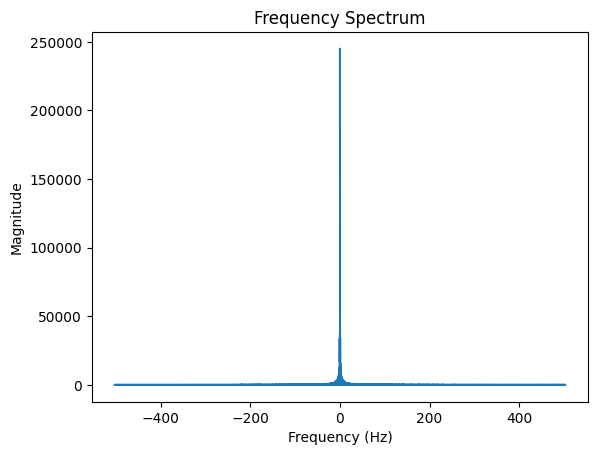

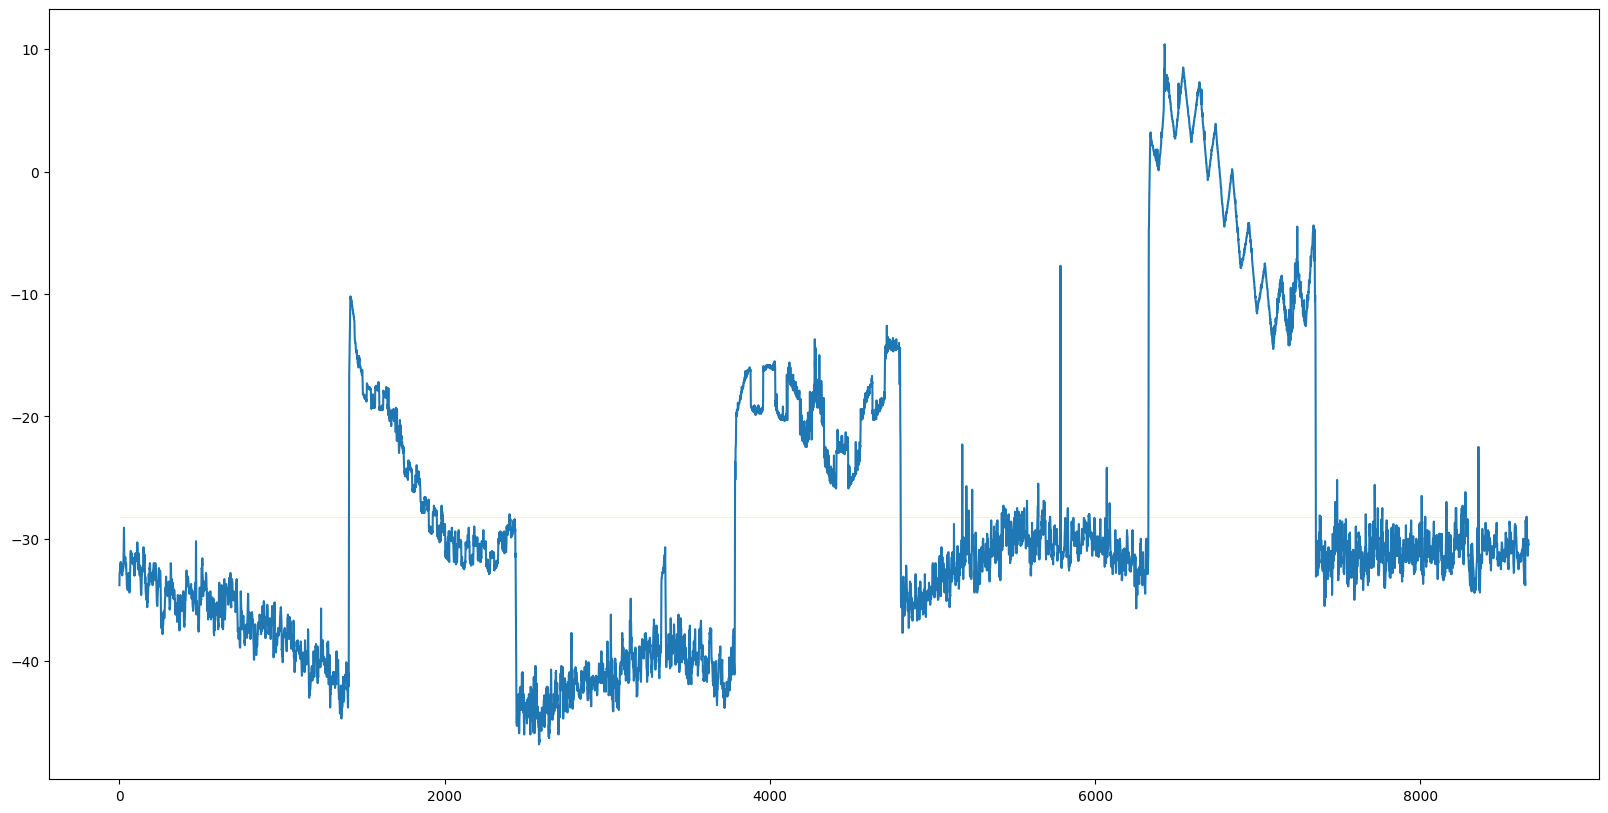

In [33]:
import numpy as np
import scipy.signal as signal

# Generate a noisy signal (replace with your actual signal)
# sampling_rate = 30000  # Your sampling rate
# duration = 10  # Signal duration in seconds
# time = np.linspace(0, duration, int(sampling_rate * duration))
# signal_freq = 50  # Frequency of your signal (known)
# noise_amplitude = 0.1  # Amplitude of white noise

# Create a noisy signal (sine wave + white noise)
# signal_data = np.sin(2 * np.pi * signal_freq * time) + noise_amplitude * np.random.randn(len(time))

signal_data = df.Texture
sampling_rate = readings_per_metre

# Compute FFT
fft_result = np.fft.fft(signal_data)
freqs = np.fft.fftfreq(len(signal_data), d=1 / sampling_rate)

# Visualize the spectrum (optional)
import matplotlib.pyplot as plt
plt.plot(freqs, np.abs(fft_result))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.show()

# Remove noise (e.g., zero out frequencies above a threshold)
threshold_freq = 0.1  # Adjust as needed
fft_result[np.abs(freqs) > threshold_freq] = 0

# Inverse FFT to get denoised signal
denoised_signal = np.fft.ifft(fft_result).real

# Now `denoised_signal` contains the cleaned signal
plt.figure(figsize=(20, 10))
plt.plot(df.Texture)
plt.plot(denoised_signal,linewidth=0.1)

In [90]:
""" Select the sections where the texture values fall between a large rise and fall"""

threshold = 9  # Given threshold
exceed_points = []

prev_val = df.iloc[1]['Texture']
for i in range(0, len(df), 15):
  current_val = df.iloc[i]['Texture'] 
  if abs(current_val - prev_val) > threshold:
    exceed_points.append(i-15)
    # i= i + 700
  prev_val = current_val

print(f"Points at which the difference in values exceeds {threshold}: {exceed_points}")

Points at which the difference in values exceeds 9: [1185, 2190, 4695, 5700, 8055, 9075]


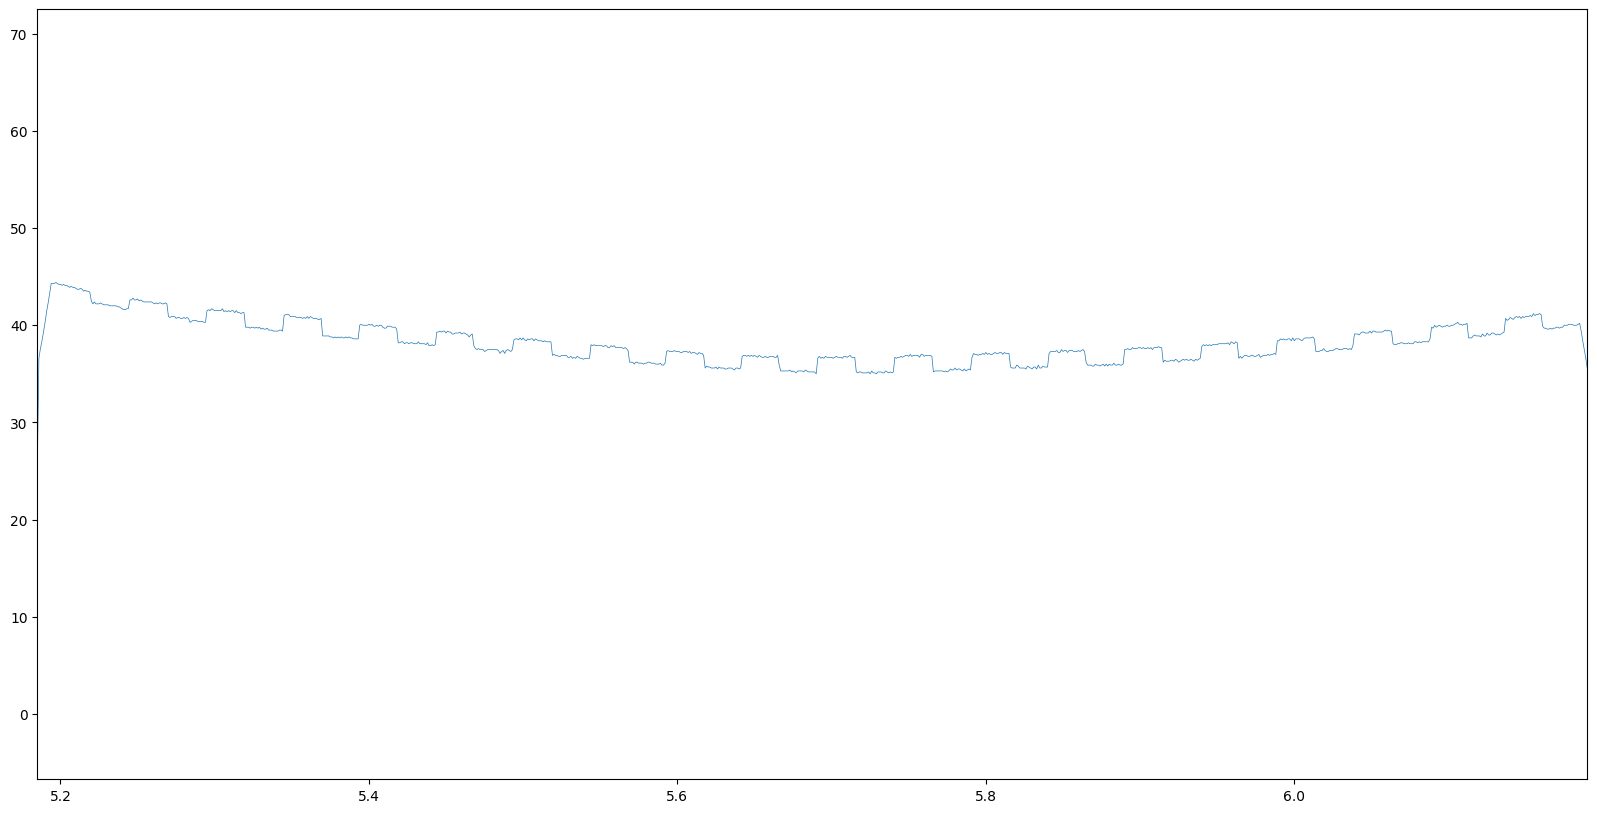

In [91]:
import matplotlib.pyplot as plt
import numpy as np

#fig, axs = plt.subplots(4)
plt.figure(figsize=(20, 10))
#plt.plot(t, y, label='Noisy signal',linewidth=1)
x_axis_from_1 = df.Chainage[exceed_points[0]]
x_axis_to_1 = df.Chainage[exceed_points[1]]
#x_axis_to_1 = df.Chainage[3085]
plt.xlim(x_axis_from_1, (x_axis_to_1))
#plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
plt.plot(df.Chainage, df.Texture, label='Plate 1',linewidth=0.5)
# 
# x_axis_from_2 = df.Chainage[exceed_points[2]]
# x_axis_to_2 = df.Chainage[exceed_points[3]]
# axs[2].xlim(x_axis_from_2, x_axis_to_2)
# #plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
# axs[2].plot(df.Chainage, df.Texture, label='Plate 2',linewidth=0.5)
# 
# x_axis_from_3 = df.Chainage[exceed_points[4]]
# x_axis_to_3 = df.Chainage[exceed_points[5]]
# axs[3].xlim(x_axis_from_3, x_axis_to_3)
# #plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
# axs[3].plot(df.Chainage, df.Texture, label='Plate 3',linewidth=0.5)
#plt.plot(x_values, y_sg, label='Sav-Gol', linewidth=0.5)
#plt.xlabel('Distance (metres)')
#plt.ylabel('Amplitude')
#plt.legend()
plt.show()

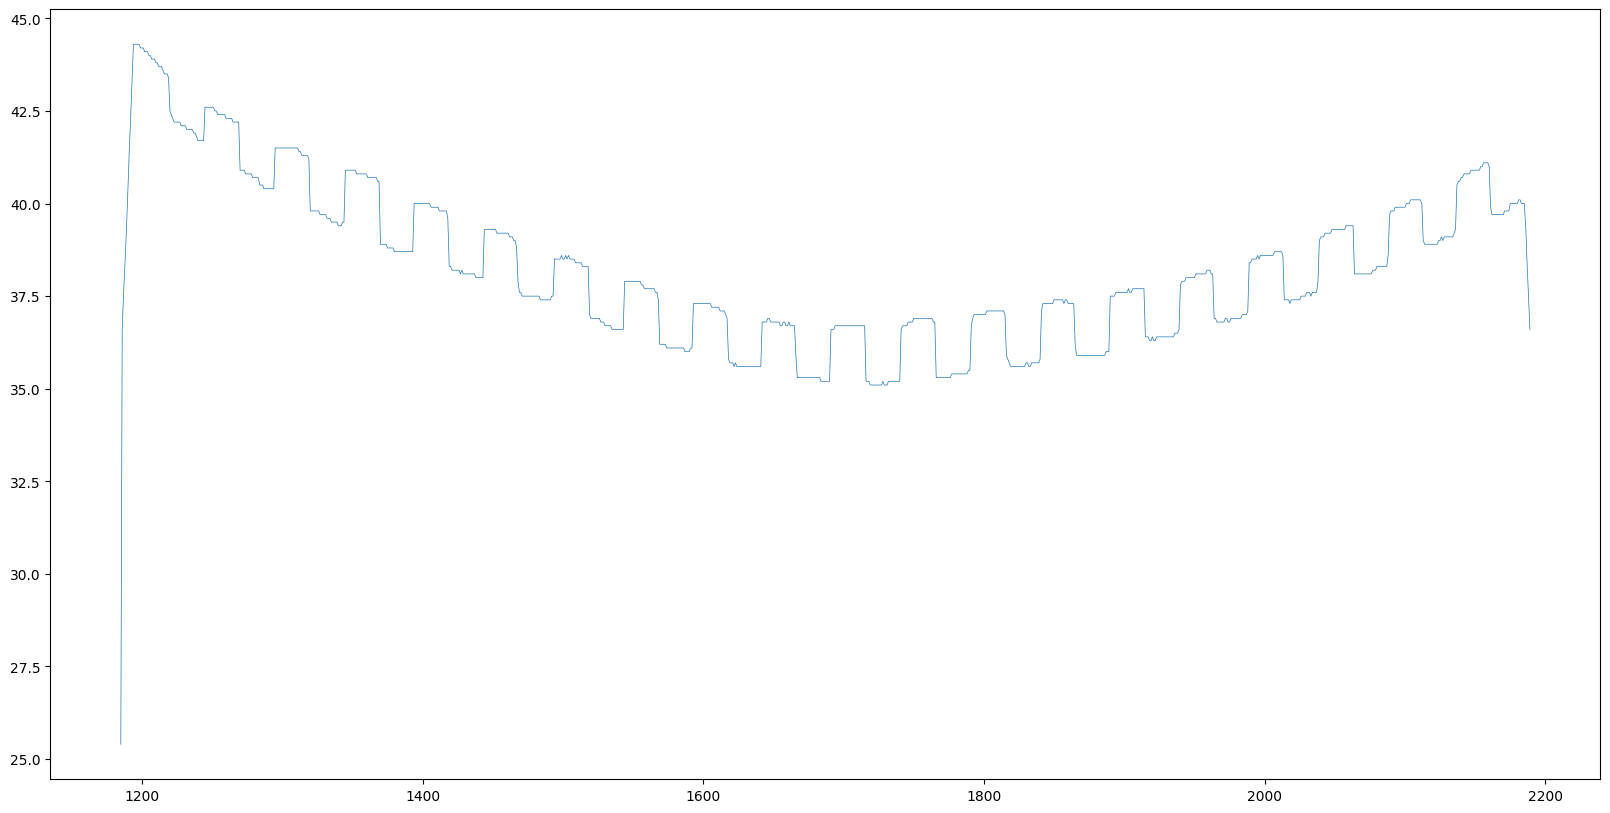

In [81]:
df_plate1 = df.iloc[exceed_points[0]:exceed_points[1]].copy()

# remove the noise from plate1 and flatten it
#import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

df_plate1['y_med'] = signal.medfilt(df_plate1.Texture, kernel_size=9)

# plot the filtered data.

plt.figure(figsize=(20, 10))
plt.plot(df_plate1.y_med, label='Plate 1',linewidth=0.5)
#plt.plot(df_plate1.Chainage, df_plate1.y_med, label='Plate 1',linewidth=0.5)
plt.show()



In [82]:
# calculate the tangent of two points on the plate and those where the tangent approaches infinity are the up or down.

def tangent_calculation(x1, y1, x2, y2):

  x_axis = x2 - x1
  y_axis = y2 - y1

  try:
    tan_value = (x_axis / y_axis)
  except:
    tan_value = 9999
  
  return tan_value

tangent_list =[]
window=1

for i in range(0, (len(df_plate1)-1), 1):
  y_value = df_plate1.iloc[i]['y_med']
  y_value_plus =df_plate1.iloc[i+window]['y_med']
  x_value = df_plate1.iloc[i]['Chainage']
  x_value_plus =df_plate1.iloc[i+window]['Chainage']
  tangent_list.append(abs(tangent_calculation(x_value, x_value_plus, y_value, y_value_plus)))

In [83]:
for i in range(0, len(tangent_list)):
    if (abs(tangent_list[i]) > 2): print(i, " ", tangent_list[i])

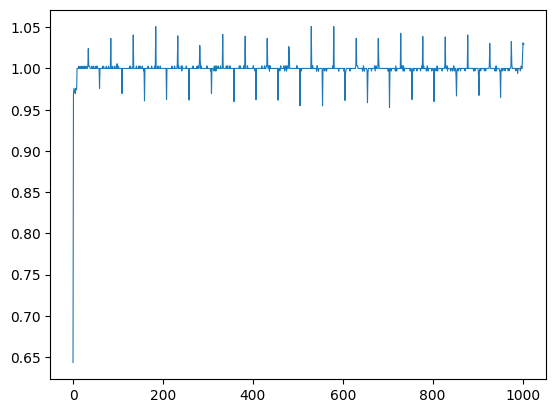

In [84]:
plt.plot(tangent_list)

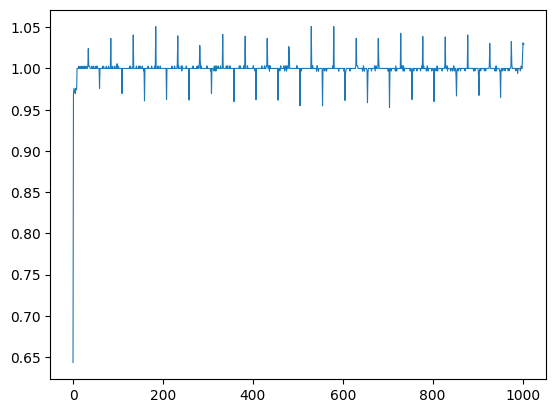

In [85]:
import numpy as np
#data = tangent_list

data = tangent_list
mean = np.mean(data)
outlier_threshold =  2 * mean
#data_with_imputed_values = [x if x < outlier_threshold else median for x in data]
data_with_imputed_values = [x if x < outlier_threshold else mean for x in data]
#print(data_with_imputed_values)
# Returns: [10, 12, 14, 15, 18, 15.5]
plt.plot(data_with_imputed_values)

In [86]:
threshold = 10  # Given threshold
exceed_points = []

prev_val = df.iloc[1]['Texture']
for i in range(0, len(df), 15):
  current_val = df.iloc[i]['Texture'] 
  if abs(current_val - prev_val) > threshold:
    exceed_points.append(i-15)
    i= i + 900
  prev_val = current_val

print(f"Points at which the difference in values exceeds {threshold}: {exceed_points}")

Points at which the difference in values exceeds 10: [1185, 4695, 5700, 8055, 9075]


In [92]:
df_plate1

,Chainage,Texture,Dropout,adjusted_Tex,y_med
1185,5.185,25.400000,0,28.500000,25.400000
1186,5.186,36.599998,0,39.699998,36.599998
1187,5.187,37.599998,0,40.699998,37.599998
1188,5.188,38.400002,0,41.500002,38.400002
1189,5.189,39.299999,0,42.399999,39.299999
...,...,...,...,...,...
2185,6.185,40.200001,0,43.300001,40.000000
2186,6.186,39.400002,0,42.500002,39.400002
2187,6.187,38.400002,0,41.500002,38.400002
2188,6.188,37.500000,0,40.600000,37.500000


In [70]:
# plt.figure(figsize=(20, 10))

# plt.plot(df_plate1.Chainage, df_plate1.tan_value,linewidth=0.5)
# # 

# plt.show()

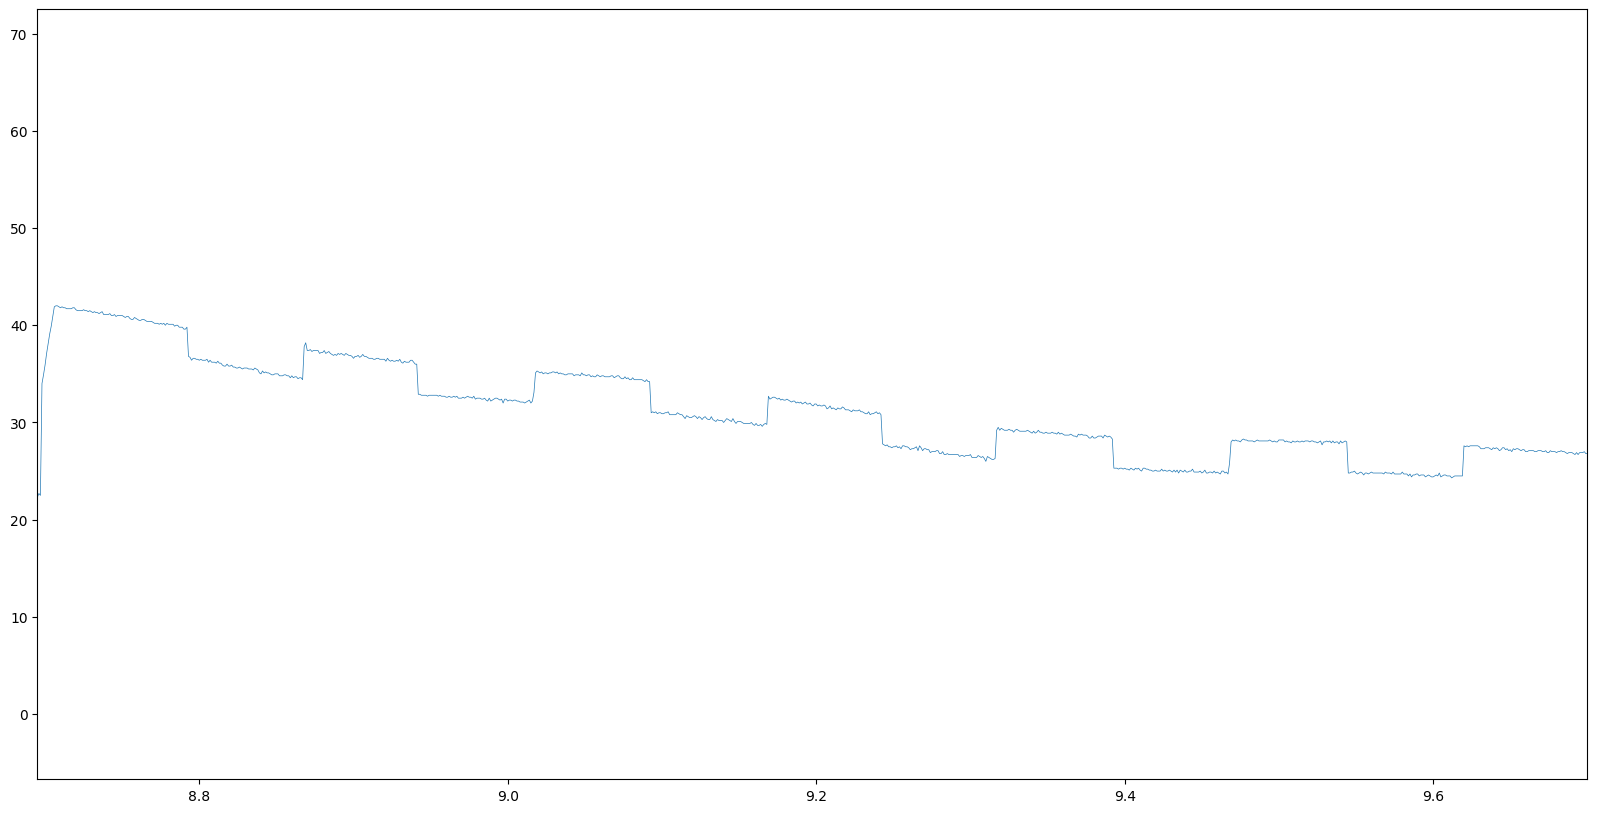

In [93]:
#fig, axs = plt.subplots(4)
plt.figure(figsize=(20, 10))
#plt.plot(t, y, label='Noisy signal',linewidth=1)
x_axis_from_2 = df.Chainage[exceed_points[2]]
x_axis_to_2 = df.Chainage[exceed_points[3]]
plt.xlim(x_axis_from_2, x_axis_to_2)
#plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
plt.plot(df.Chainage, df.Texture, label='Plate 2',linewidth=0.5)
# 
# x_axis_from_2 = df.Chainage[exceed_points[2]]
# x_axis_to_2 = df.Chainage[exceed_points[3]]
# axs[2].xlim(x_axis_from_2, x_axis_to_2)
# #plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
# axs[2].plot(df.Chainage, df.Texture, label='Plate 2',linewidth=0.5)
# 
# x_axis_from_3 = df.Chainage[exceed_points[4]]
# x_axis_to_3 = df.Chainage[exceed_points[5]]
# axs[3].xlim(x_axis_from_3, x_axis_to_3)
# #plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
# axs[3].plot(df.Chainage, df.Texture, label='Plate 3',linewidth=0.5)
#plt.plot(x_values, y_sg, label='Sav-Gol', linewidth=0.5)
#plt.xlabel('Distance (metres)')
#plt.ylabel('Amplitude')
#plt.legend()
plt.show()

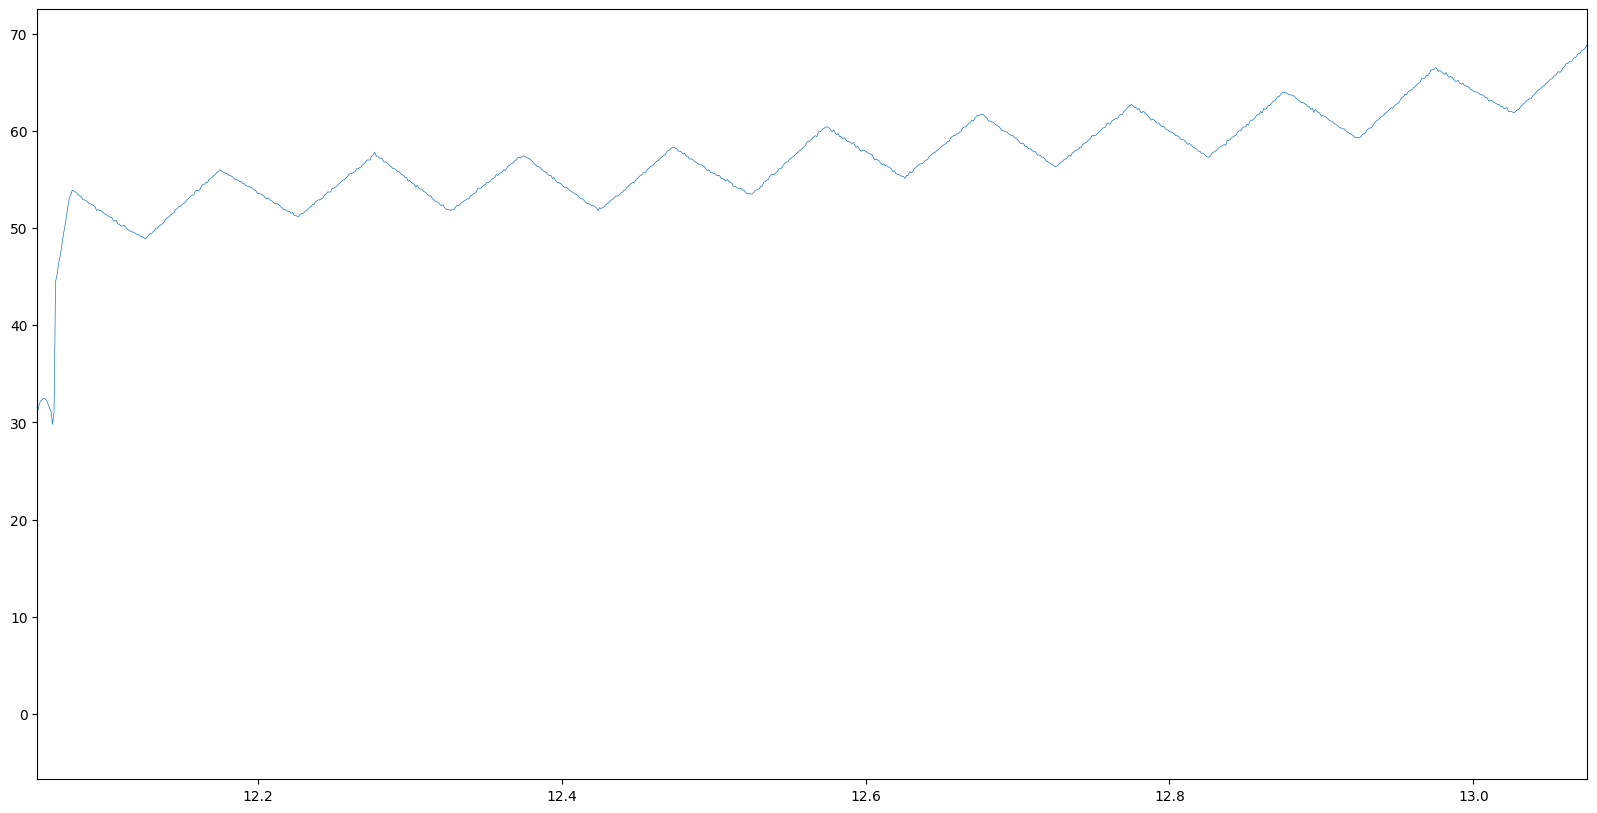

In [94]:
#fig, axs = plt.subplots(4)
plt.figure(figsize=(20, 10))
#plt.plot(t, y, label='Noisy signal',linewidth=1)
x_axis_from_3 = df.Chainage[exceed_points[4]]
x_axis_to_3 = df.Chainage[exceed_points[5]]
plt.xlim(x_axis_from_3, x_axis_to_3)
#plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
plt.plot(df.Chainage, df.Texture, label='Plate 3',linewidth=0.5)
# 
# x_axis_from_2 = df.Chainage[exceed_points[2]]
# x_axis_to_2 = df.Chainage[exceed_points[3]]
# axs[2].xlim(x_axis_from_2, x_axis_to_2)
# #plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
# axs[2].plot(df.Chainage, df.Texture, label='Plate 2',linewidth=0.5)
# 
# x_axis_from_3 = df.Chainage[exceed_points[4]]
# x_axis_to_3 = df.Chainage[exceed_points[5]]
# axs[3].xlim(x_axis_from_3, x_axis_to_3)
# #plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
# axs[3].plot(df.Chainage, df.Texture, label='Plate 3',linewidth=0.5)
#plt.plot(x_values, y_sg, label='Sav-Gol', linewidth=0.5)
#plt.xlabel('Distance (metres)')
#plt.ylabel('Amplitude')
#plt.legend()
plt.show()

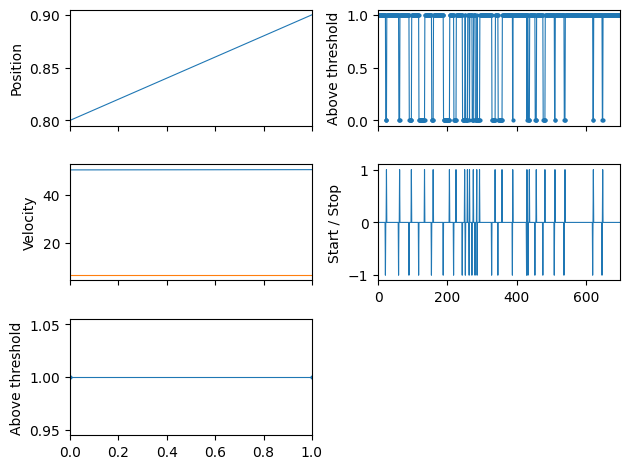

{'EndTimes': array([ 0.051,  0.074,  0.085,  0.099,  0.113,  0.14 ,  0.169,  0.2  ,
        0.242,  0.26 ,  0.286,  0.297,  0.314,  0.331,  0.373,  0.382,
        0.42 ,  0.439,  0.462,  0.522,  0.553,  0.579,  0.613,  0.634,
        0.662,  0.675,  0.697,  0.706,  0.727,  0.76 ,  0.822,  0.835,
        0.882,  0.953,  1.007,  1.131,  1.159,  1.187,  1.207,  1.237,
        1.261,  1.295,  1.306,  1.313,  1.324,  1.335,  1.36 ,  1.391,
        1.412,  1.446,  1.487,  1.504,  1.549,  1.575,  1.604,  1.642,
        1.66 ,  1.685,  1.731,  1.74 ,  1.754,  1.789,  1.809,  1.827,
        1.88 ,  1.941,  1.951,  1.984,  1.987,  1.99 ,  2.014,  2.052,
        2.093,  2.099,  2.106,  2.165,  2.306,  2.343,  2.364,  2.402,
        2.428,  2.461,  2.511,  2.559,  2.577,  2.593,  2.631,  2.639,
        2.651,  2.669,  2.693,  2.719,  2.727,  2.76 ,  2.823,  2.845,
        2.895,  2.974,  3.006,  3.045,  3.079,  3.128,  3.17 ,  3.176,
        3.192,  3.216,  3.253,  3.272,  3.308,  3.323,  3.334,  

In [ ]:
""" Show how events can be elegantly detected using binary indexing """

# Import the standard packages
import numpy as npy
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from scipy import signal, io
from pprint import pprint

# Get eye positions, sampled with 100 Hz
# data_dir = r'..\..\data'
# file_name = 'HorPos.mat'
# in_file = os.path.join(data_dir, file_name)

rate = 1000
#data = io.loadmat(in_file)
hor_pos = df.Texture

# General layout of the plot
fig, axs = plt.subplots(3,2)
mpl.rc('lines', lw=0.8)         # Set the default line-width to '0.8'

# Select an interesting domain
my_domain = range(3, 5, 1)
axs[0,0].plot(hor_pos[my_domain])
axs[0,0].set_ylabel('Position')
axs[0,0].tick_params(labelbottom=False) # equiv. to axs[0,0].set_xticklabels([])
axs[0,0].margins(x=0)

# Plot the absolute eye velocity
eye_vel = signal.savgol_filter(hor_pos, window_length=71, polyorder=3,
        deriv=1, delta=1/rate)
eye_vel_abs = np.abs(eye_vel)
axs[1,0].plot(eye_vel_abs[my_domain])

# Set a default threshold, in case the threshold is not determined interactively
threshold = 6.3
axs[1,0].axhline(threshold, color='C1')
axs[1,0].tick_params(labelbottom=False)
axs[1,0].margins(x=0)
axs[1,0].set_ylabel('Velocity')

# To find the threshold interactively, use the following lines
# I like to put the user-instructions in the window-title:
#plt.gcf().canvas.set_window_title('Select the threshold')
#selectedPoint = plt.ginput(1);       # ginput returns a list of (x/y)-tuples
#threshold = selectedPoint[0][1];     # I only want the y-value
#plt.gcf().canvas.set_window_title('')

# Plot3: show where the absolute velocity exceeds the threshold
is_fast = eye_vel_abs > threshold
axs[2,0].plot(is_fast[my_domain], 'o-', ms=2)   # 'ms' is short for 'markersize'
axs[2,0].set_ylabel('Above threshold')
axs[2,0].margins(x=0)

# Plot4: as Plot3, but zoomed in
close_domain = range(9900, 10600, 1)
axs[0,1].plot(is_fast[close_domain], 'o-', ms=2)
axs[0,1].set_ylabel('Above threshold')
axs[0,1].tick_params(labelbottom=False)
axs[0,1].margins(x=0)

# Plot5: Find the start and end of each movement
start_stop = np.diff(is_fast*1)   # "*1": to convert boolean signal to numerical
axs[1,1].plot(start_stop[close_domain])
axs[1,1].set_ylabel('Start / Stop')
axs[1,1].margins(x=0)

axs[2,1].axis('off')        # removes the empty axis to the lower right
plt.tight_layout()

# Save and show the figure
out_file = 'event_detection.jpg'
#plt.savefig(out_file, dpi=200, quality=90)
#print(f'Image saved to {out_file}')

plt.show()

# Find the start and end times for all movements (in sec)
movement = {}
movement['StartTimes'] = np.where(start_stop ==  1)[0]/rate
movement['EndTimes']   = np.where(start_stop == -1)[0]/rate
pprint(movement)        # 'pprint' gives a nicer printout than 'print'


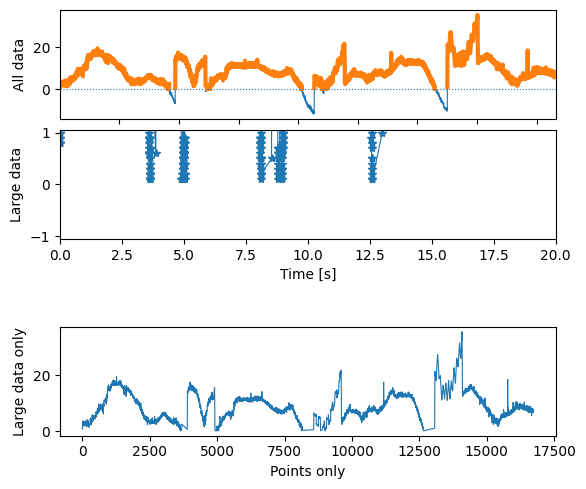

In [ ]:
""" Show logical indexing """

# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt

# Create a sine-wave
dt = 0.1
duration = 20
#time = np.arange(0,duration,dt)
#data = np.sin(time)
time = df.Chainage
data = df.Texture

# Set a threshold
threshold = 0

# Find the (binary) indices of all data above that threshold
is_large = data > threshold

# For plotting of "large" data, set all "not large" data to "np.nan"
# Note that I explicitly copy the data!
large_data = data.copy()
large_data[~is_large] = np.nan

# Plot the data
fig, axs = plt.subplots(3,1)

axs[0].plot(time, data)
axs[0].plot(time, large_data, lw=3)
axs[1].plot(time[is_large], data[is_large], '*-')
axs[2].plot(data[is_large])

# Format the plot
axs[0].set_ylabel('All data')
axs[0].axhline(threshold, ls='dotted')
axs[0].margins(x=0)
axs[0].set_xticklabels([])

axs[1].set_ylabel('Large data')
axs[1].set_xlabel('Time [s]')
axs[1].margins(x=0)
axs[1].set_xlim(0, duration)
axs[1].set_ylim(-1.05, 1.05)

axs[2].set_ylabel('Large data only')
axs[2].set_xlabel('Points only')

# Group the top two axes, since they have the same x-scale
axs[0].set_position([0.125, 0.75, 0.775, 0.227])
axs[1].set_position([0.125, 0.50, 0.775, 0.227])
axs[2].set_position([0.125, 0.09, 0.775, 0.227])

# Save and show the figure
#out_file = 'FindingEvents.jpg'
#plt.savefig(out_file, dpi=200, quality=90)
#print(f'Image saved to {out_file}')

plt.show()

In [ ]:
%pip install loess

Note: you may need to restart the kernel to use updated packages.


NameError: name 'x_values' is not defined

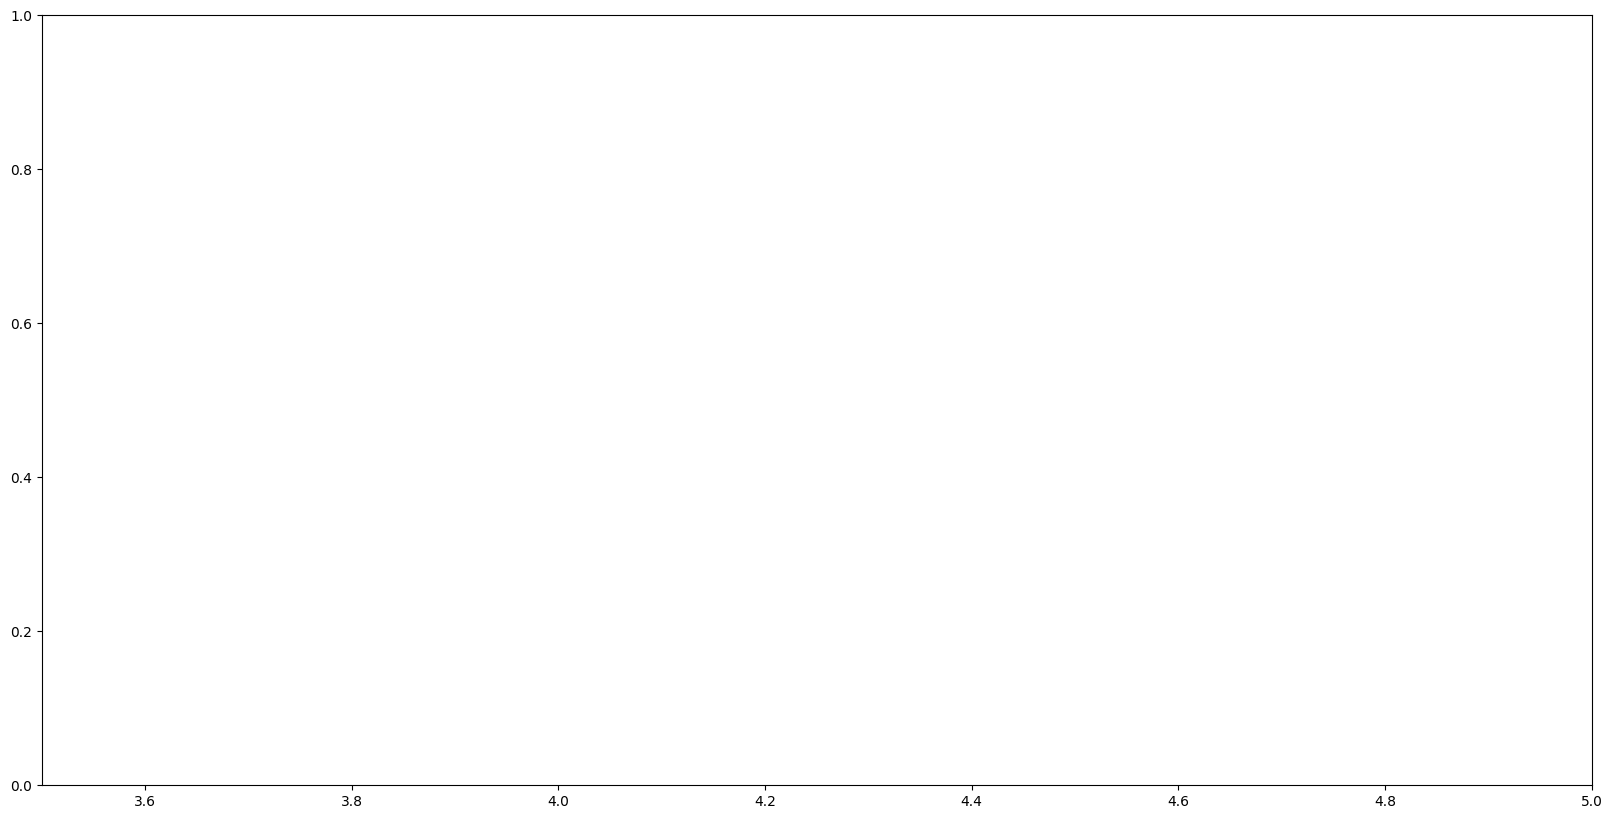

In [89]:
y_sg = signal.savgol_filter( df.Texture,
                             window_length=9,
                             polyorder=2) # deriv=1)
plt.figure(figsize=(20, 10))
#plt.plot(t, y, label='Noisy signal',linewidth=1)
plt.xlim(3.5,5)
#plt.plot(x_values, df.Texture, label='Noisy signal',linewidth=1)
plt.plot(x_values, y_sos, label='SOS Filtered signal',linewidth=0.5)
plt.plot(x_values, y_sg, label='Sav-Gol', linewidth=0.5)
plt.xlabel('Distance (metres)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
%pip install scipy

In [ ]:
from scipy import fftpack
import numpy as np
signal_noise = df.Texture
sec = readings_per_metre/2
time = np.linspace(0, len(df.Texture), len(df.Texture), endpoint=True).astype(int)

sig_noise_fft = fftpack.fft(signal_noise.values)
sig_noise_amp = 2 / time.size * np.abs(sig_noise_fft)
sig_noise_freq = np.abs(fftpack.fftfreq(time.size, readings_per_metre))

In [ ]:
print(sig_noise_amp)
print(sig_noise_freq)

[56.50992384  8.51451731  3.86922468 ...  7.86300785  3.86922468
  8.51451731]
[0.0000000e+00 1.1473147e-07 2.2946294e-07 ... 3.4419441e-07 2.2946294e-07
 1.1473147e-07]


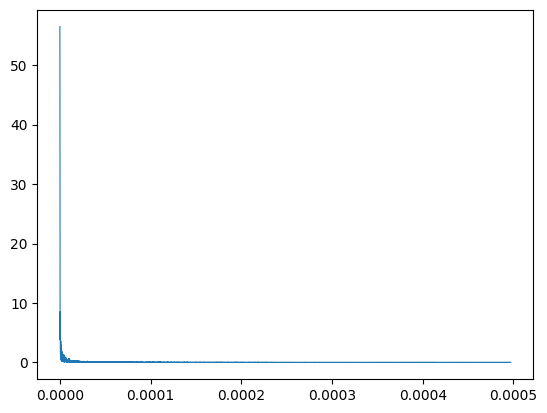

In [ ]:
plt.plot(sig_noise_freq, sig_noise_amp)

In [ ]:
signal_amplitude = pd.Series(sig_noise_amp).nlargest(2).round(0).astype(int).tolist()
print(signal_amplitude)

In [ ]:
#Calculate Frequency Magnitude
magnitudes = abs(sig_noise_fft[np.where(sig_noise_freq >= 0)])
#Get index of top 2 frequencies
peak_frequency = np.sort((np.argpartition(magnitudes, -2)[-2:])/sec)
print(peak_frequency)

[0.         0.00198853]


In [ ]:
from scipy.signal import butter,filtfilt
# Filter requirements.
#fs = 1000.0       # sample rate, Hz
fs=400
cutoff = peak_frequency[1]     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 2 Hz
order = 2       # sin wave can be approx represented as quadratic
def butter_lowpass_filter(data, cutoff, fs, order):
    print("Cutoff freq " + str(cutoff))
    nyq = 0.5 * fs # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a,data)
    return y
# Filter the data, and plot filtered signals.
y = butter_lowpass_filter(signal_noise, cutoff, fs, order)

Cutoff freq 0.0019885258396030465


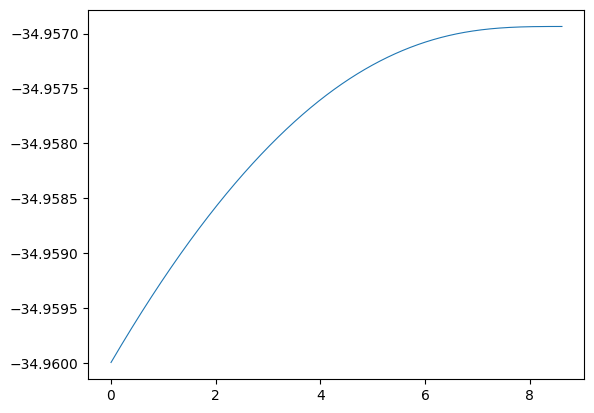

In [ ]:
plt.plot(df.Chainage, y)

In [ ]:
import numpy as np
from scipy import signal
data = {}
data['before'] = df.Texture
data['after_fir'] = signal.lfilter(np.ones(len(data)), 1, data['before'])
data['after_iir'] = signal.lfilter([1], [1,-0.5], data['before'])



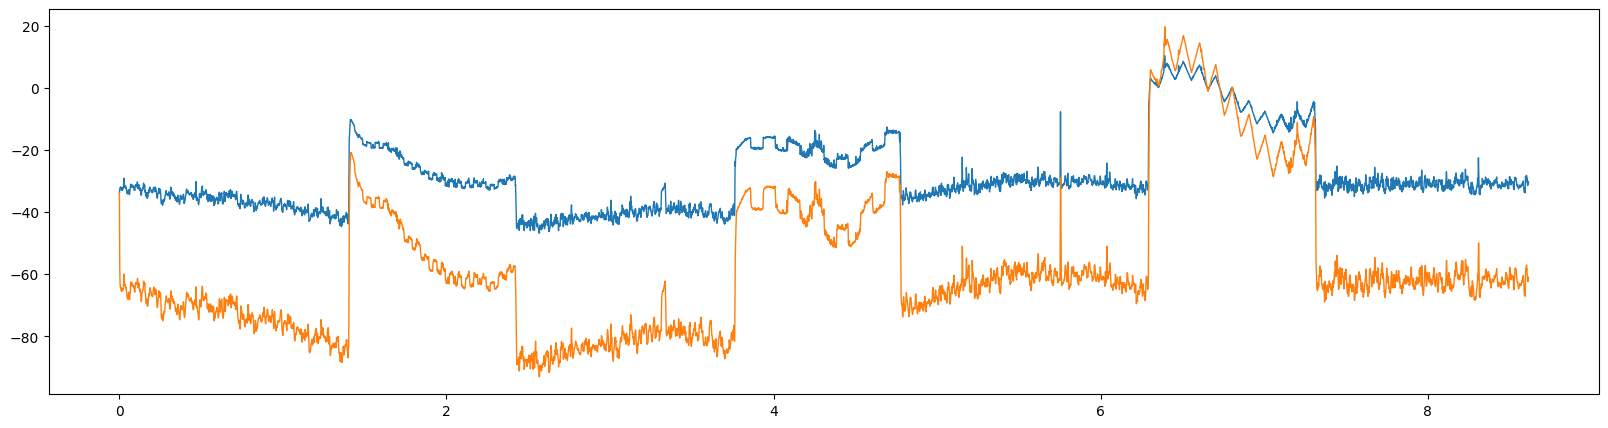

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(df.Chainage, data['before'], label='before',lw=1)
#plt.plot(df.Chainage, data['after_fir'], label='FIR',lw=1)
plt.plot(df.Chainage, data['after_iir'], label='IIR',lw=1)
#plt.subplots(figsize=(10,5))

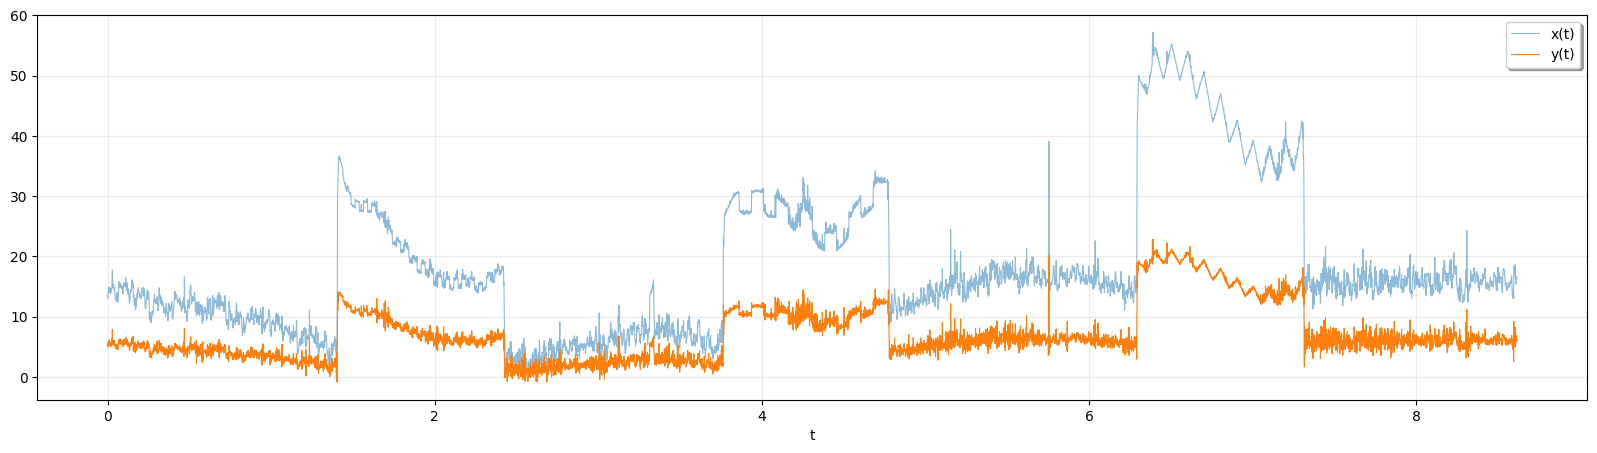

In [ ]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.signal import sosfiltfilt, butter

def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

# Load sample data from a WAV file
#sample_rate, data = scipy.io.wavfile.read(df.Texture)
#times = np.arange(len(data))/sample_rate

#sosfiltfilt(sos.)
x = df.adjusted_Tex
sos = butter(6, 0.125, btype='highpass', analog=True, output='sos')
y = sosfiltfilt(sos, x)
t=df.Chainage

from scipy.signal import sosfilt, sosfilt_zi
#sos8 = butter(8, 0.125, output='sos')
#zi = x[:4].mean() * sosfilt_zi(sos8)
#y2, zo = sosfilt(sos8, x, zi=zi)
plt.subplots(figsize=(20,5))
plt.plot(t, x, alpha=0.5, label='x(t)')
plt.plot(t, y, label='y(t)')
#plt.plot(t, y2, label='y2(t)')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.xlabel('t')
#plt.subplots(figsize=(20,5))
plt.show()

In [ ]:
import numpy as np
from scipy.signal import butter,sosfiltfilt
import plotly.graph_objects as go

#sample_rate = (len(df)/2)/max(df.Chainage)

sample_period = max(df.Chainage)
sample_rate = 8000
n = len(df) # total number of samples
nyq = 0.5 * sample_rate
cutoff=1
order=8 # started at 2
data = df.adjusted_Tex

def butter_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    sos = butter(order, normal_cutoff, btype='highpass', analog=True, output='sos')
    y = sosfiltfilt(sos, data)
    return y

# Filter the data, and plot both the original and filtered signals.
filtered_y = butter_filter(data, cutoff, sample_rate, order)
fig = go.Figure()
# fig.add_trace(go.Scatter(
#             y = data,
#             line =  dict(shape =  'spline' ),
#             name = 'signal with noise'
#             ))
fig.add_trace(go.Scatter(
            y = filtered_y,
            line =  dict(shape =  'linear',
                         width=0.5 ),
            name = 'filtered signal'
            ))
fig.show()

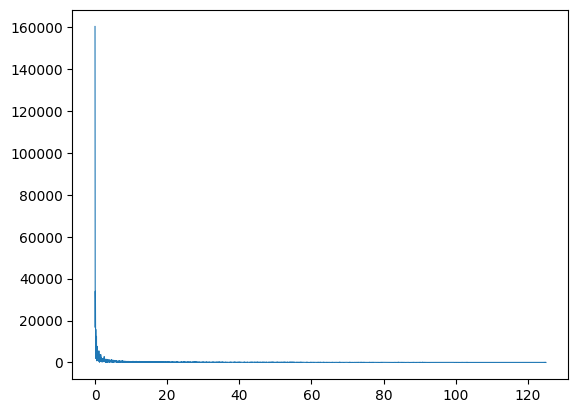

In [ ]:
# now get the high frequency noise out...
# problem is that this data is not based on time but the x-axis is distance (mm)

from scipy.fft import rfft,rfftfreq,fftfreq
import numpy as np
import matplotlib.pyplot as plt

freqs = fftfreq(len(filtered_y), 8000)
t= np.arange(0,8000, 1)
from scipy.fft import rfft,rfftfreq
data_step   = 0.004
f_noise = filtered_y
n    = len(filtered_y)
yf   = rfft(f_noise)
xf   = rfftfreq(n,data_step)
#plt.plot(xf,np.abs(yf))

yf_abs      = np.abs(yf) 
indices     = yf_abs>1   # filter out those value under 300
yf_clean    = indices * yf # noise frequency will be set to 0
plt.plot(xf,np.abs(yf_clean))
#t           = np.arange(start=0,stop=1,step=data_step)

# n    = len(t)
# yf   = rfft(f_noise)
# xf   = rfftfreq(n,data_step)
# plt.plot(xf,np.abs(yf))


# yf_abs      = np.abs(filtered_y) 
# indices     = yf_abs>2   # filter out those value under 300
# yf_clean    = indices * filtered_y # noise frequency will be set to 0
# plt.plot(df.Chainage,np.abs(yf_clean))



In [ ]:
n = len(df.Texture)
dt = 1
fhat = np.fft.fft(df.Texture, n)
psd = fhat * np.conj(fhat)/n
freq = (1/n) * np.arange(n) #frequency array
idxs_half = np.arange(1, np.floor(n), dtype=np.int32) #first half index

In [ ]:
threshold = 10
signal = df.Texture[:8000]
signal_clean = signal
psd_idxs = psd > threshold #array of 0 and 1
psd_clean = psd * psd_idxs #zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat #used to retrieve the signal
minsignal, maxsignal = signal.min(), signal.max()
signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform
signal_filtered = signal_filtered[:8000]

c:\Users\rjaques\AppData\Local\Continuum\anaconda3\envs\p3_12_1\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

c:\Users\rjaques\AppData\Local\Continuum\anaconda3\envs\p3_12_1\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



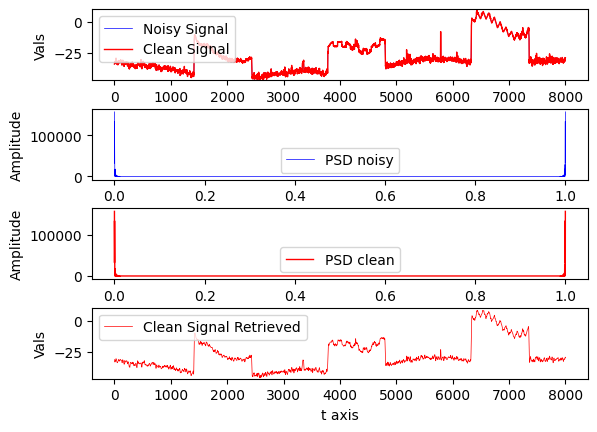

In [ ]:
## Visualization

fig, ax = plt.subplots(4,1)
ax[0].plot(t, signal, color='b', lw=0.5, label='Noisy Signal')
ax[0].plot(t, signal_clean, color='r', lw=1, label='Clean Signal')
ax[0].set_ylim([minsignal, maxsignal])
ax[0].set_xlabel('t axis')
ax[0].set_ylabel('Vals')
ax[0].legend()

ax[1].plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', lw=0.5, label='PSD noisy')
ax[1].set_xlabel('Frequencies in Hz')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', lw=1, label='PSD clean')
ax[2].set_xlabel('Frequencies in Hz')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

ax[3].plot(t, signal_filtered, color='r', lw=0.5, label='Clean Signal Retrieved')
ax[3].set_ylim([minsignal, maxsignal])
ax[3].set_xlabel('t axis')
ax[3].set_ylabel('Vals')
ax[3].legend()

plt.subplots_adjust(hspace=0.4)


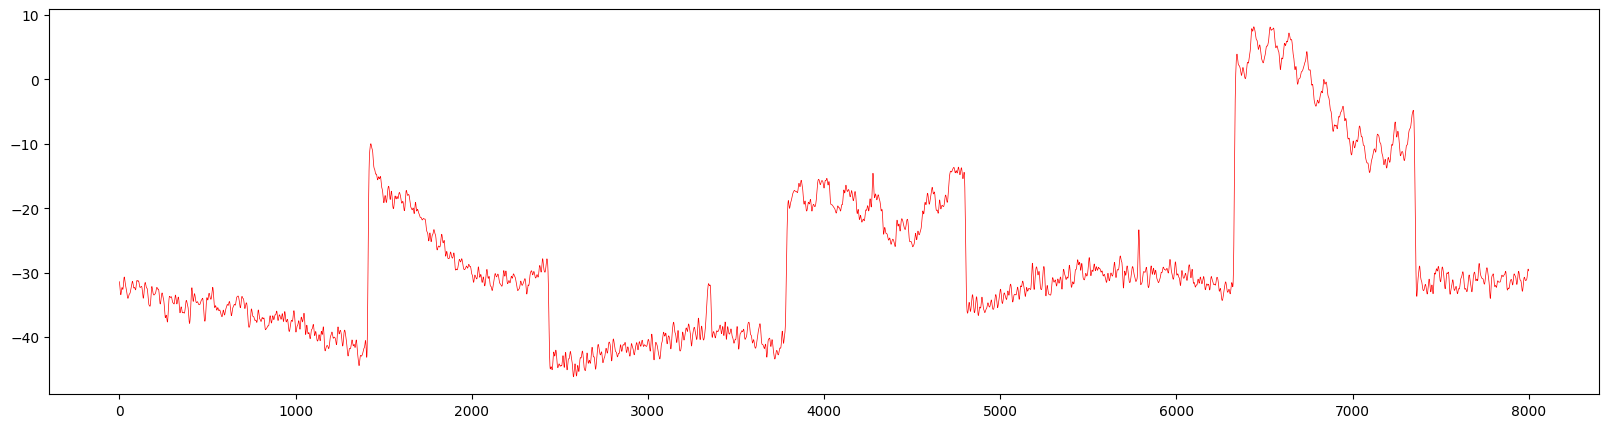

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(t, signal_filtered, color='r', lw=0.5, label='Clean Signal Retrieved')
#plt.set_ylim([minsignal, maxsignal])
#plt.set_xlabel('t axis')
#plt.set_ylabel('Vals')


(-6.0, 8.0)

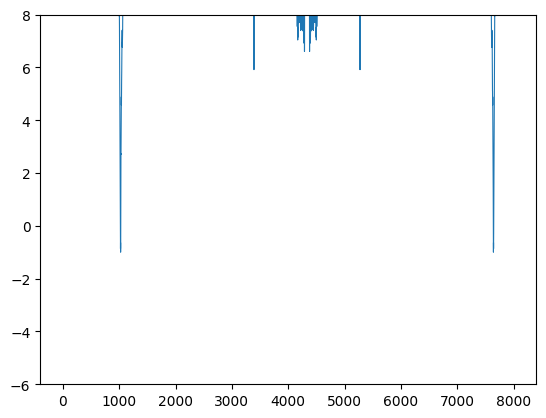

In [ ]:
from scipy.fft import irfft
new_f_clean = irfft(yf_abs)
plt.plot(t,new_f_clean[:8000])
plt.ylim(-6,8)

ValueError: x and y must have same first dimension, but have shapes (8000,) and (8666,)

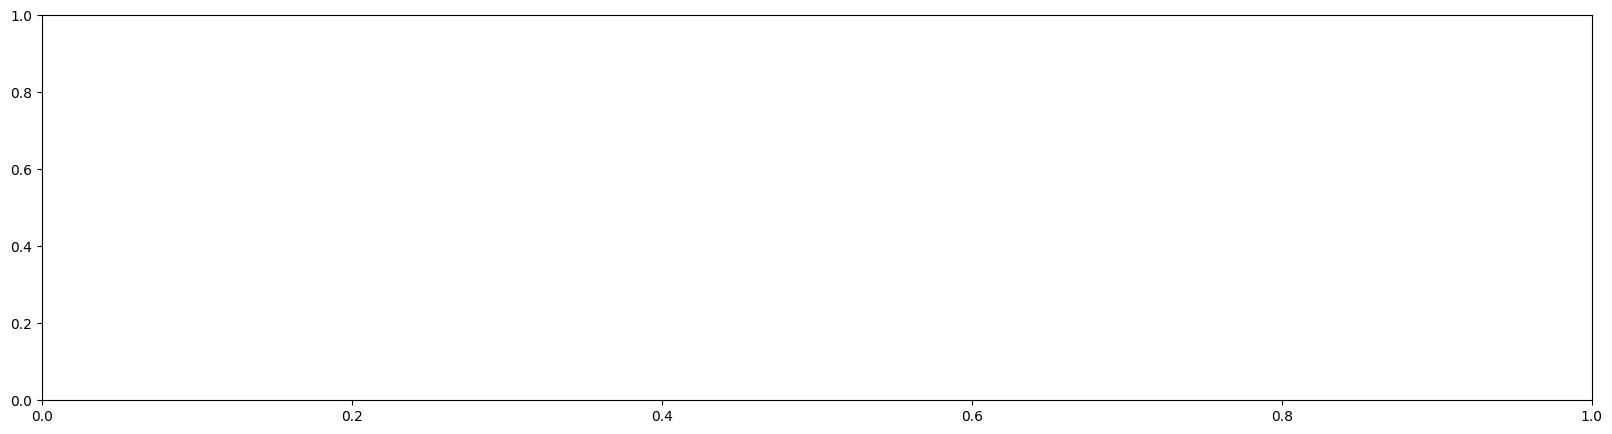

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0, 500

#x = np.arange(1, len(df), 0.1)  # x axis
#z = np.random.normal(mu, sigma, len(x))  # noise
# y from previous cell
#y = x ** 2 + z  # data
plt.subplots(figsize=(20,5))
plt.plot(t, y, linewidth=0.25)  # it includes some noise

from scipy.signal import lfilter

n = 30  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, y)
#plt.plot(x, yy, linewidth=2, linestyle="-", c="b")  # smooth by filter

# from scipy.signal import savgol_filter
# w = savgol_filter(y, 50, 2)
# plt.plot( w, x, 'b')  # high frequency noise removed

In [ ]:
# the frequency of the noise is the length of the signal/2
# noise_frequency = (len(df)/2)/ max(df.Chainage)

# sos = signal.butter(4, Wn=(noise_frequency/4), btype='highpass', fs=(noise_frequency*2), output='sos')
# filtered = signal.sosfilt(sos, sig)
# ax2.plot(t, filtered)
# ax2.set_title('After 15 Hz high-pass filter')
# ax2.axis([0, 1, -2, 2])
# ax2.set_xlabel('Time [seconds]')
# plt.tight_layout()
# plt.show() 


In [ ]:
# max(df.Chainage)/len(df.Chainage) * 2

In [ ]:
# n = len(df.Chainage)
# fhat = np.fft.fft(y, n) #computes the fft
# psd = fhat * np.conj(fhat)/n
# #freq = (1/(dt*n)) * np.arange(n) #frequency array
# hertz = max(df.Chainage)/len(df.Chainage) * 2
# idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index

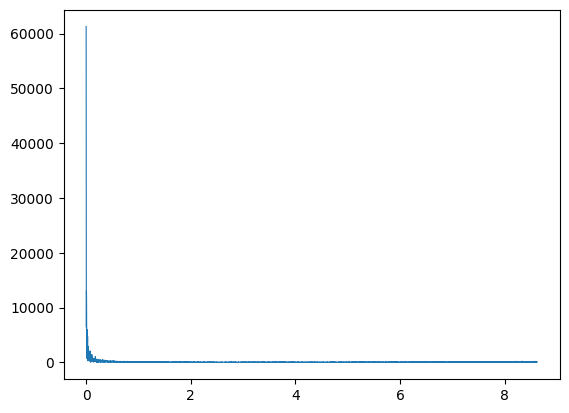

In [ ]:
# remove the noise from the filtered signal
# the filtered signal is y from cell above

from scipy.fft import rfft,rfftfreq
n    = len(t)
yf   = rfft(y)
x =df.Chainage[::2]

y=np.abs(yf)
y = np.delete(y, -1)
#xf   = rfftfreq(n,data_step)
plt.plot(x,y)

0.000994262919801523
8.616282463


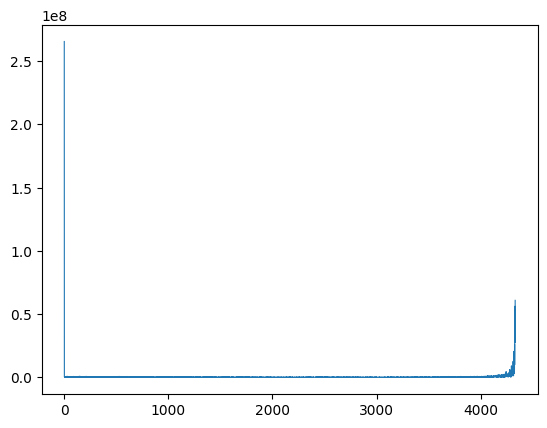

In [ ]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
SAMPLE_RATE = max(df.Chainage)/len(df.Chainage)
print(SAMPLE_RATE)
DURATION = max(df.Chainage)
print(DURATION)
N = int(len(df))
temp_fft = scipy.fftpack.fft(np.array(y))
yf = scipy.fftpack.fft(temp_fft, axis=-1)
#yf = fft(normalized_tone)
xf = fftfreq(N, 1/SAMPLE_RATE)

plt.plot(np.abs(yf))
plt.show()

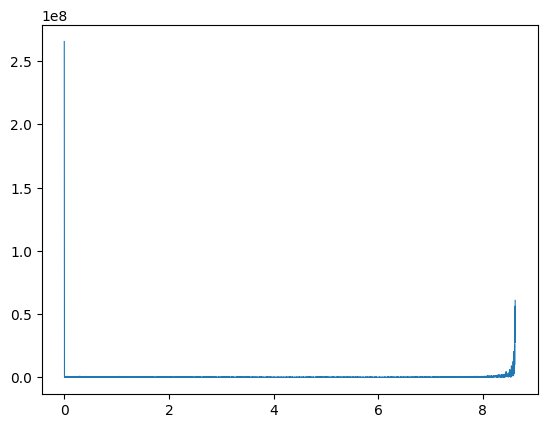

In [ ]:
#points_per_freq = len(xf)/(SAMPLE_RATE/2)
#target_idx = int(points_per_freq * 4000)
xf = df.iloc[1::2]
xf= xf.Chainage
yf[1 : 4] = 0
plt.plot(xf, np.abs(yf))
plt.show()

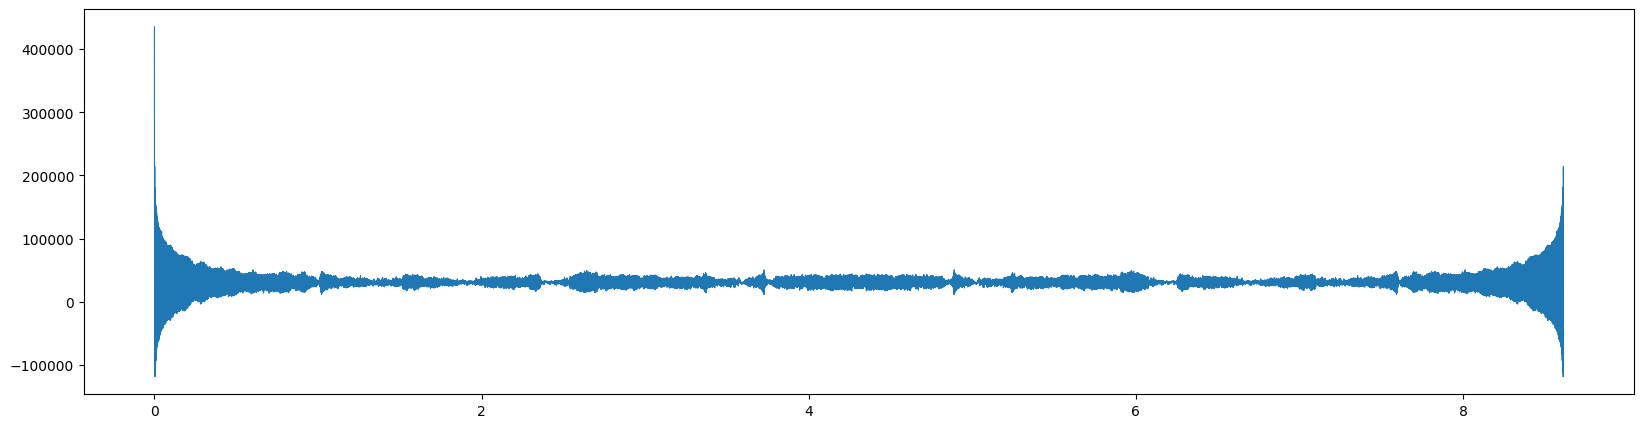

In [ ]:
from scipy.fft import irfft

new_sig = irfft(yf)
df_sub = df.head(-2)
plt.subplots(figsize=(20,5))
plt.plot(df_sub.Chainage, new_sig)
plt.show()

In [ ]:
import scipy.signal

d1 = df.Texture
N = len(d1)
#d1_fft = fft(df.adjusted_Tex)
x_axis = d1[1:N]
#f = LinRange(-0.5, 0.5, N+1)[1:N]  # normalized frequency 
fs = 1;   # sampling frequency
fc = 0.005;  # frequency cutoff, less than Fnyquist=0.5
filt = digitalfilter(Highpass(fc,fs=fs), Butterworth(6));
d2 = filtfilt(filt, d1)  #filtered signal
p1 = plot(x_axis[1:N], d2[1:N], lw=1,label="Filtered flipped signal",xlabel="Time", legend=topleft)
#plot!(t[1:N÷2], d3_trunc[1:N÷2], ls=:dash,lc=:black, lw=1,label="From truncated spectrum (100 points)")
plot(p1, size=(4000,1000))

NameError: name 'digitalfilter' is not defined

In [ ]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt

def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read(df.Texture)
times = np.arange(len(data))/sample_rate

# Apply a 10-50 Hz high-pass filter to the original data
filtered = bandpass(data, [10, 50], sample_rate)

TypeError: expected str, bytes or os.PathLike object, not Series